In [ ]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

In [ ]:
warnings.simplefilter(action='ignore')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
# Aradhya dataset load
df = pd.read_csv('/content/Copy of KOLKATA_data.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df.shape

(15417, 33)

In [ ]:
df.head()

,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_PAR_TOT,ALLSKY_SFC_SW_DWN,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,CLRSKY_SFC_PAR_TOT,CLRSKY_SFC_SW_DWN,GWETPROF,GWETROOT,GWETTOP,PS,QV2M,RH2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TOA_SW_DWN,TS,WD10M,WD2M,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS2M,WS2M_MAX,WS2M_MIN,WS2M_RANGE,PRECTOTCORR
0,335.5,80.44,14.690,9.270,0.1987,1.028,81.25,15.140,0.55,0.55,0.53,101.40,6.71,56.80,17.84,8.21,13.03,25.66,9.48,-257.0,25.61,17.08,276.8,277.8,2.69,4.96,0.22,4.75,1.77,3.79,0.16,3.63,0.00
1,348.0,81.10,15.586,9.164,0.2125,1.094,81.80,16.140,0.55,0.55,0.52,101.30,8.36,58.75,20.19,11.39,15.79,27.27,14.21,-260.0,26.47,18.98,248.9,249.2,1.77,4.02,0.69,3.33,1.23,2.99,0.48,2.52,0.00
2,364.2,75.30,13.920,8.080,0.1799,0.895,72.44,14.730,0.55,0.55,0.52,101.20,9.95,65.70,21.38,14.04,17.70,27.94,16.52,-261.8,25.56,20.77,214.2,213.8,2.06,4.10,0.60,3.50,1.38,3.15,0.35,2.80,0.28
3,364.0,72.30,13.750,8.150,0.1825,0.925,71.25,13.900,0.55,0.55,0.56,101.06,11.17,72.60,21.52,15.83,18.69,27.83,16.45,-261.8,24.45,21.10,254.8,255.5,2.17,2.98,0.77,2.22,1.43,2.37,0.50,1.87,3.97
4,375.5,58.66,10.875,5.805,0.1238,0.640,60.40,13.195,0.55,0.55,0.56,101.06,10.50,74.90,19.69,14.83,17.27,24.90,15.74,-264.0,24.94,19.60,202.9,203.1,3.09,5.21,0.41,4.80,2.10,3.98,0.30,3.68,2.86


In [ ]:
y = df[['ALLSKY_SFC_UV_INDEX']]

In [ ]:
x = df.drop(columns=['ALLSKY_SFC_UV_INDEX'])

In [ ]:
x.columns

Index(['ALLSKY_SFC_LW_DWN', 'ALLSKY_SFC_PAR_TOT', 'ALLSKY_SFC_SW_DWN',
       'ALLSKY_SFC_UVA', 'ALLSKY_SFC_UVB', 'CLRSKY_SFC_PAR_TOT',
       'CLRSKY_SFC_SW_DWN', 'GWETPROF', 'GWETROOT', 'GWETTOP', 'PS', 'QV2M',
       'RH2M', 'T2M', 'T2MDEW', 'T2MWET', 'T2M_MAX', 'T2M_MIN', 'T2M_RANGE',
       'TOA_SW_DWN', 'TS', 'WD10M', 'WD2M', 'WS10M', 'WS10M_MAX', 'WS10M_MIN',
       'WS10M_RANGE', 'WS2M', 'WS2M_MAX', 'WS2M_MIN', 'WS2M_RANGE',
       'PRECTOTCORR'],
      dtype='object')

In [ ]:
y.head()

,ALLSKY_SFC_UV_INDEX
0,1.028
1,1.094
2,0.895
3,0.925
4,0.640


In [ ]:
x.head()

,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_PAR_TOT,ALLSKY_SFC_SW_DWN,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,CLRSKY_SFC_PAR_TOT,CLRSKY_SFC_SW_DWN,GWETPROF,GWETROOT,GWETTOP,PS,QV2M,RH2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TOA_SW_DWN,TS,WD10M,WD2M,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS2M,WS2M_MAX,WS2M_MIN,WS2M_RANGE,PRECTOTCORR
0,335.5,80.44,14.690,9.270,0.1987,81.25,15.140,0.55,0.55,0.53,101.40,6.71,56.80,17.84,8.21,13.03,25.66,9.48,-257.0,25.61,17.08,276.8,277.8,2.69,4.96,0.22,4.75,1.77,3.79,0.16,3.63,0.00
1,348.0,81.10,15.586,9.164,0.2125,81.80,16.140,0.55,0.55,0.52,101.30,8.36,58.75,20.19,11.39,15.79,27.27,14.21,-260.0,26.47,18.98,248.9,249.2,1.77,4.02,0.69,3.33,1.23,2.99,0.48,2.52,0.00
2,364.2,75.30,13.920,8.080,0.1799,72.44,14.730,0.55,0.55,0.52,101.20,9.95,65.70,21.38,14.04,17.70,27.94,16.52,-261.8,25.56,20.77,214.2,213.8,2.06,4.10,0.60,3.50,1.38,3.15,0.35,2.80,0.28
3,364.0,72.30,13.750,8.150,0.1825,71.25,13.900,0.55,0.55,0.56,101.06,11.17,72.60,21.52,15.83,18.69,27.83,16.45,-261.8,24.45,21.10,254.8,255.5,2.17,2.98,0.77,2.22,1.43,2.37,0.50,1.87,3.97
4,375.5,58.66,10.875,5.805,0.1238,60.40,13.195,0.55,0.55,0.56,101.06,10.50,74.90,19.69,14.83,17.27,24.90,15.74,-264.0,24.94,19.60,202.9,203.1,3.09,5.21,0.41,4.80,2.10,3.98,0.30,3.68,2.86


In [ ]:
df.corr()

,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_PAR_TOT,ALLSKY_SFC_SW_DWN,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,CLRSKY_SFC_PAR_TOT,CLRSKY_SFC_SW_DWN,GWETPROF,GWETROOT,GWETTOP,PS,QV2M,RH2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TOA_SW_DWN,TS,WD10M,WD2M,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS2M,WS2M_MAX,WS2M_MIN,WS2M_RANGE,PRECTOTCORR
ALLSKY_SFC_LW_DWN,1.000000,0.165762,0.027480,0.297065,0.470633,0.470611,0.784037,0.767032,0.283634,0.297419,0.276884,-0.828461,0.910446,0.544619,0.847671,0.899906,0.939560,0.529516,0.943349,-0.697323,0.843395,0.818889,-0.565143,-0.564515,0.407164,0.415989,0.310060,0.302695,0.456700,0.387296,0.350659,0.239663,0.366774
ALLSKY_SFC_PAR_TOT,0.165762,1.000000,0.976599,0.968704,0.903279,0.902777,0.504198,0.421211,-0.324961,-0.326923,-0.402953,-0.177519,0.069934,-0.331310,0.468168,0.072032,0.253146,0.635538,0.277623,0.276407,0.375526,0.496058,-0.027247,-0.027474,0.098530,0.127060,0.053182,0.133948,0.123016,0.124377,0.068017,0.120967,-0.325187
ALLSKY_SFC_SW_DWN,0.027480,0.976599,1.000000,0.923713,0.830479,0.830385,0.371273,0.309054,-0.382698,-0.387022,-0.462489,-0.055622,-0.056195,-0.421154,0.375614,-0.045001,0.138817,0.597381,0.159605,0.391800,0.268559,0.408012,0.057876,0.057495,0.026760,0.055817,-0.003795,0.085983,0.046599,0.055859,0.008359,0.076225,-0.392149
ALLSKY_SFC_UVA,0.297065,0.968704,0.923713,1.000000,0.970919,0.969298,0.643096,0.550574,-0.203268,-0.202955,-0.282980,-0.309254,0.224300,-0.189000,0.555962,0.218629,0.383848,0.644337,0.405700,0.118429,0.487621,0.574062,-0.126902,-0.127047,0.158684,0.186303,0.102565,0.171831,0.187656,0.181059,0.118163,0.157170,-0.234937
ALLSKY_SFC_UVB,0.470633,0.903279,0.830479,0.970919,1.000000,0.998790,0.773169,0.685434,-0.102030,-0.098418,-0.177227,-0.476050,0.402095,-0.042020,0.669264,0.384805,0.538132,0.672146,0.562457,-0.057830,0.634335,0.678012,-0.235374,-0.235495,0.244768,0.271905,0.170818,0.229678,0.280547,0.262982,0.191133,0.209056,-0.113095
ALLSKY_SFC_UV_INDEX,0.470611,0.902777,0.830385,0.969298,0.998790,1.000000,0.770138,0.682435,-0.108015,-0.104455,-0.183732,-0.473576,0.398497,-0.046957,0.669825,0.381594,0.536374,0.675526,0.561226,-0.052831,0.632979,0.679284,-0.234486,-0.234595,0.245052,0.272990,0.169875,0.232222,0.280891,0.263947,0.190431,0.211209,-0.114057
CLRSKY_SFC_PAR_TOT,0.784037,0.504198,0.371273,0.643096,0.773169,0.770138,1.000000,0.946726,0.079938,0.093418,0.051075,-0.813637,0.733684,0.261567,0.833345,0.686539,0.799753,0.647601,0.835522,-0.438236,0.907529,0.820283,-0.442171,-0.442100,0.502879,0.525232,0.379415,0.394219,0.547396,0.509493,0.413345,0.362547,0.293753
CLRSKY_SFC_SW_DWN,0.767032,0.421211,0.309054,0.550574,0.685434,0.682435,0.946726,1.000000,0.038702,0.052946,0.023906,-0.826868,0.729864,0.249538,0.839798,0.685824,0.802172,0.656626,0.839637,-0.434537,0.935148,0.828364,-0.422665,-0.422838,0.526669,0.550157,0.398132,0.412204,0.574279,0.536191,0.438136,0.378482,0.299919
GWETPROF,0.283634,-0.324961,-0.382698,-0.203268,-0.102030,-0.108015,0.079938,0.038702,1.000000,0.999059,0.943623,-0.220950,0.495655,0.792630,-0.048005,0.485542,0.282313,-0.439020,0.211141,-0.715732,0.019996,-0.120430,-0.221133,-0.220663,-0.148503,-0.200380,-0.057183,-0.238009,-0.154105,-0.216910,-0.080246,-0.248788,0.291281
GWETROOT,0.297419,-0.326923,-0.387022,-0.202955,-0.098418,-0.104455,0.093418,0.052946,0.999059,1.000000,0.948555,-0.236578,0.509985,0.802075,-0.037455,0.498759,0.295267,-0.434805,0.224629,-0.729063,0.035663,-0.110372,-0.229949,-0.229478,-0.137510,-0.189298,-0.048895,-0.229972,-0.142247,-0.205925,-0.071093,-0.241209,0.308557


#Feature Selection

LASSO Regression (L1 Regularization)

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(x, y)
importances1 = np.abs(lasso.coef_)

In [ ]:
importances1

array([1.30901564e-03, 1.14864973e-03, 0.00000000e+00, 1.27873951e-01,
       0.00000000e+00, 3.57951087e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.67233428e-03, 0.00000000e+00, 2.98663117e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.84935644e-04,
       0.00000000e+00, 0.00000000e+00, 2.19259071e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.47820410e-05])

In [ ]:
x_1 = x.loc[:, importances1 != 0]

In [ ]:
x_1.head()

,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,CLRSKY_SFC_PAR_TOT,RH2M,T2MDEW,TOA_SW_DWN,WD2M,PRECTOTCORR
0,335.5,80.44,9.270,81.25,56.80,8.21,25.61,277.8,0.00
1,348.0,81.10,9.164,81.80,58.75,11.39,26.47,249.2,0.00
2,364.2,75.30,8.080,72.44,65.70,14.04,25.56,213.8,0.28
3,364.0,72.30,8.150,71.25,72.60,15.83,24.45,255.5,3.97
4,375.5,58.66,5.805,60.40,74.90,14.83,24.94,203.1,2.86


In [ ]:
x_1.columns

Index(['ALLSKY_SFC_LW_DWN', 'ALLSKY_SFC_PAR_TOT', 'ALLSKY_SFC_UVA',
       'CLRSKY_SFC_PAR_TOT', 'RH2M', 'T2MDEW', 'TOA_SW_DWN', 'WD2M',
       'PRECTOTCORR'],
      dtype='object')

In [ ]:
x_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15417 entries, 0 to 15416
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ALLSKY_SFC_LW_DWN   15417 non-null  float64
 1   ALLSKY_SFC_PAR_TOT  15417 non-null  float64
 2   ALLSKY_SFC_UVA      15417 non-null  float64
 3   CLRSKY_SFC_PAR_TOT  15417 non-null  float64
 4   RH2M                15417 non-null  float64
 5   T2MDEW              15417 non-null  float64
 6   TOA_SW_DWN          15417 non-null  float64
 7   WD2M                15417 non-null  float64
 8   PRECTOTCORR         15417 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB


In [ ]:
x_1.nunique()

ALLSKY_SFC_LW_DWN      671
ALLSKY_SFC_PAR_TOT    2140
ALLSKY_SFC_UVA        1957
CLRSKY_SFC_PAR_TOT    1473
RH2M                  1102
T2MDEW                2083
TOA_SW_DWN             776
WD2M                  2140
PRECTOTCORR           2218
dtype: int64

In [ ]:
# Summary statistics
summary_stats = df.describe()

Random Forest Feature Importance

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x, y)
importances2 = rf.feature_importances_

In [ ]:
importances2

array([1.01207992e-04, 1.01360400e-04, 9.86379463e-05, 1.90155152e-04,
       9.97816864e-01, 2.16141043e-04, 1.01519189e-04, 3.36735866e-05,
       3.38679489e-05, 5.98031968e-05, 6.02355040e-05, 3.53644857e-05,
       9.38330983e-05, 4.83962462e-05, 4.34290877e-05, 4.83016871e-05,
       8.12032896e-05, 5.43346897e-05, 7.31699283e-05, 7.98619673e-05,
       4.95705848e-05, 6.80761777e-05, 7.11260911e-05, 3.70567163e-05,
       4.25681851e-05, 5.09478852e-05, 6.99640040e-05, 3.78944364e-05,
       4.09692991e-05, 5.16049466e-05, 6.61400942e-05, 4.27212674e-05])

In [ ]:
top_feature_indices = np.argsort(importances2)[-9:]
top_feature_columns = x.columns[top_feature_indices]
x_2 = x[top_feature_columns]

In [ ]:
x_2.head()

,T2M_MAX,RH2M,ALLSKY_SFC_SW_DWN,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_UVA,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVB
0,25.66,56.80,14.690,335.5,80.44,15.140,9.270,81.25,0.1987
1,27.27,58.75,15.586,348.0,81.10,16.140,9.164,81.80,0.2125
2,27.94,65.70,13.920,364.2,75.30,14.730,8.080,72.44,0.1799
3,27.83,72.60,13.750,364.0,72.30,13.900,8.150,71.25,0.1825
4,24.90,74.90,10.875,375.5,58.66,13.195,5.805,60.40,0.1238


In [ ]:
x_2.columns

Index(['T2M_MAX', 'RH2M', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_LW_DWN',
       'ALLSKY_SFC_PAR_TOT', 'CLRSKY_SFC_SW_DWN', 'ALLSKY_SFC_UVA',
       'CLRSKY_SFC_PAR_TOT', 'ALLSKY_SFC_UVB'],
      dtype='object')

Using ANOVA Test

In [ ]:
from sklearn.feature_selection import f_regression, RFE
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
f_values, p_values = f_regression(x, y)

In [ ]:
i = np.array([f_values])
print(i)

[[4.38526390e+03 6.79121875e+04 3.42370132e+04 2.39539518e+05
  6.35632832e+06 2.24701485e+04 1.34368125e+04 1.81973127e+02
  1.70047247e+02 5.38549554e+02 4.45670701e+03 2.91001140e+03
  3.40644175e+01 1.25444587e+04 2.62719878e+03 6.22608285e+03
  1.29388997e+04 7.08781884e+03 4.31450556e+01 1.03050440e+04
  1.32068942e+04 8.96889202e+02 8.97769906e+02 9.84812890e+02
  1.24128705e+03 4.58059575e+02 8.78673526e+02 1.32042329e+03
  1.15435458e+03 5.80045736e+02 7.19760346e+02 2.03177690e+02]]


In [ ]:
print(p_values)

[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 3.08018966e-041
 1.15718803e-038 3.93447900e-117 0.00000000e+000 0.00000000e+000
 5.43880497e-009 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 5.24556621e-011 0.00000000e+000
 0.00000000e+000 1.36617260e-191 9.00704266e-192 1.32509115e-209
 1.35601045e-261 3.62833179e-100 7.58216980e-188 1.79459948e-277
 4.60224445e-244 7.65759593e-126 5.34295694e-155 8.26953150e-046]


In [ ]:
top_feature_indices = np.argsort(f_values)[-9:]
x_3 = x.iloc[:, top_feature_indices]

In [ ]:
x_3.head()

,T2M,T2M_MAX,TS,CLRSKY_SFC_SW_DWN,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_SW_DWN,ALLSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB
0,17.84,25.66,17.08,15.140,81.25,14.690,80.44,9.270,0.1987
1,20.19,27.27,18.98,16.140,81.80,15.586,81.10,9.164,0.2125
2,21.38,27.94,20.77,14.730,72.44,13.920,75.30,8.080,0.1799
3,21.52,27.83,21.10,13.900,71.25,13.750,72.30,8.150,0.1825
4,19.69,24.90,19.60,13.195,60.40,10.875,58.66,5.805,0.1238


In [ ]:
x_3.columns

Index(['T2M', 'T2M_MAX', 'TS', 'CLRSKY_SFC_SW_DWN', 'CLRSKY_SFC_PAR_TOT',
       'ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_PAR_TOT', 'ALLSKY_SFC_UVA',
       'ALLSKY_SFC_UVB'],
      dtype='object')

Recursive Feature Elimination with Cross-Validation (RFECV)

In [ ]:
from sklearn.feature_selection import RFECV
model = LinearRegression()
rfecv = RFECV(estimator=model, step=1, cv=5)
rfecv.fit(x, y)

rankings = rfecv.ranking_

top_feature_indices = np.argsort(rankings)[:9]

x_4 = x.iloc[:, top_feature_indices]

In [ ]:
x_4.head()

,ALLSKY_SFC_LW_DWN,WS2M_MIN,WS2M_MAX,WS2M,WS10M_RANGE,WS10M_MIN,WS10M_MAX,WS10M,WD2M
0,335.5,0.16,3.79,1.77,4.75,0.22,4.96,2.69,277.8
1,348.0,0.48,2.99,1.23,3.33,0.69,4.02,1.77,249.2
2,364.2,0.35,3.15,1.38,3.50,0.60,4.10,2.06,213.8
3,364.0,0.50,2.37,1.43,2.22,0.77,2.98,2.17,255.5
4,375.5,0.30,3.98,2.10,4.80,0.41,5.21,3.09,203.1


In [ ]:
x_4.columns

Index(['ALLSKY_SFC_LW_DWN', 'WS2M_MIN', 'WS2M_MAX', 'WS2M', 'WS10M_RANGE',
       'WS10M_MIN', 'WS10M_MAX', 'WS10M', 'WD2M'],
      dtype='object')

Gradient Boosting Feature Importance:

In [ ]:

from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(x, y)

importances3 = gb.feature_importances_

In [ ]:
importances3

array([7.35321470e-05, 1.53660682e-04, 4.83113236e-05, 3.95084132e-05,
       9.99526215e-01, 3.24459850e-05, 8.20434045e-06, 5.23870179e-06,
       2.65576777e-06, 7.48636133e-06, 0.00000000e+00, 1.95070237e-06,
       1.67208147e-05, 3.05019361e-06, 2.10364696e-06, 6.90148576e-06,
       2.16334676e-06, 2.61991084e-07, 1.79418425e-05, 7.32706702e-06,
       3.37039497e-06, 1.69258806e-05, 1.07659854e-05, 3.62418181e-07,
       0.00000000e+00, 3.02567527e-08, 9.62464295e-06, 2.07989219e-06,
       2.14125147e-07, 0.00000000e+00, 7.47779832e-07, 1.98355013e-07])

In [ ]:
top_feature_indices = np.argsort(importances3)[-9:]

x_5 = x.iloc[:, top_feature_indices]

In [ ]:
x_5.head()

,RH2M,WD10M,T2M_RANGE,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_SW_DWN,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_PAR_TOT,ALLSKY_SFC_UVB
0,56.80,276.8,-257.0,81.25,9.270,14.690,335.5,80.44,0.1987
1,58.75,248.9,-260.0,81.80,9.164,15.586,348.0,81.10,0.2125
2,65.70,214.2,-261.8,72.44,8.080,13.920,364.2,75.30,0.1799
3,72.60,254.8,-261.8,71.25,8.150,13.750,364.0,72.30,0.1825
4,74.90,202.9,-264.0,60.40,5.805,10.875,375.5,58.66,0.1238


In [ ]:
x_5.columns

Index(['RH2M', 'WD10M', 'T2M_RANGE', 'CLRSKY_SFC_PAR_TOT', 'ALLSKY_SFC_UVA',
       'ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_LW_DWN', 'ALLSKY_SFC_PAR_TOT',
       'ALLSKY_SFC_UVB'],
      dtype='object')

#Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from sklearn.svm import SVR

In [ ]:
d1 = {'x_1': 'L1', 'x_2': 'RFFI', 'x_3': 'ANOVA', 'x_4': 'RFECV', 'x_5': 'GBFI'}

In [ ]:
report_df = pd.DataFrame(columns=['LR_MAE', 'LR_RMSE', 'LR_RS', 'KNN_MAE', 'KNN_RMSE', 'KNN_RS', 'DT_MAE', 'DT_RMSE', 'DT_RS', 'RF_MAE', 'RF_RMSE', 'RF_RS', 'SV_MAE', 'SV_RMSE', 'SV_RS', 'AD_MAE', 'AD_RMSE', 'AD_RS', 'XG_MAE', 'XG_RMSE', 'XG_RS'])

In [ ]:
count = 1
for x in [x_1, x_2, x_3, x_4, x_5]:
  print(f"X{count}")
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  # Linear Regression
  linear_model = LinearRegression()
  linear_model.fit(X_train, y_train)
  linear_predictions = linear_model.predict(X_test)
  linear_mae = mean_absolute_error(y_test, linear_predictions)
  linear_rmse = mean_squared_error(y_test, linear_predictions, squared=False)
  linear_r2 = r2_score(y_test, linear_predictions)
  print("Linear Regression MAE:", round(linear_mae, 4))
  print("Linear Regression RMSE:", round(linear_rmse, 4))
  print("Linear Regression R-squared:", round(linear_r2, 4))

  # K-Nearest Neighbors Regressor
  knn_model = KNeighborsRegressor()
  knn_model.fit(X_train, y_train)
  knn_predictions = knn_model.predict(X_test)
  knn_mae = mean_absolute_error(y_test, knn_predictions)
  knn_rmse = mean_squared_error(y_test, knn_predictions, squared=False)
  knn_r2 = r2_score(y_test, knn_predictions)
  print("K-Nearest Neighbors Regressor MAE:", round(knn_mae, 4))
  print("K-Nearest Neighbors Regressor RMSE:", round(knn_rmse, 4))
  print("K-Nearest Neighbors Regressor R-squared:", round(knn_r2, 4))

  # Decision Tree Regressor
  dt_model = DecisionTreeRegressor()
  dt_model.fit(X_train, y_train)
  dt_predictions = dt_model.predict(X_test)
  dt_mae = mean_absolute_error(y_test, dt_predictions)
  dt_rmse = mean_squared_error(y_test, dt_predictions, squared=False)
  dt_r2 = r2_score(y_test, dt_predictions)
  print("Decision Tree Regressor MAE:", round(dt_mae, 4))
  print("Decision Tree Regressor RMSE:", round(dt_rmse, 4))
  print("Decision Tree Regressor R-squared:", round(dt_r2, 4))

  # Random Forest Regressor
  rf_model = RandomForestRegressor()
  rf_model.fit(X_train, y_train)
  rf_predictions = rf_model.predict(X_test)
  rf_mae = mean_absolute_error(y_test, rf_predictions)
  rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
  rf_r2 = r2_score(y_test, rf_predictions)
  print("Random Forest Regressor MAE:", round(rf_mae, 4))
  print("Random Forest Regressor RMSE:", round(rf_rmse, 4))
  print("Random Forest Regressor R-squared:", round(rf_r2, 4))

  # Support Vector Machine Regressor
  svm_model = SVR()
  svm_model.fit(X_train, y_train)
  svm_predictions = svm_model.predict(X_test)
  svm_mae = mean_absolute_error(y_test, svm_predictions)
  svm_rmse = mean_squared_error(y_test, svm_predictions, squared=False)
  svm_r2 = r2_score(y_test, svm_predictions)
  print("Support Vector Machine Regressor MAE:", round(svm_mae, 4))
  print("Support Vector Machine Regressor RMSE:", round(svm_rmse, 4))
  print("Support Vector Machine Regressor R-squared:", round(svm_r2, 4))

  # AdaBoost Regressor with Decision Tree as the base estimator
  base_estimator = DecisionTreeRegressor(max_depth=3)
  adaboost_model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=50, random_state=42)
  adaboost_model.fit(X_train, y_train)
  adaboost_predictions = adaboost_model.predict(X_test)
  adaboost_mae = mean_absolute_error(y_test, adaboost_predictions)
  adaboost_rmse = mean_squared_error(y_test, adaboost_predictions, squared=False)
  adaboost_r2 = r2_score(y_test, adaboost_predictions)
  print("AdaBoost Regressor MAE:", round(adaboost_mae, 4))
  print("AdaBoost Regressor RMSE:", round(adaboost_rmse, 4))
  print("AdaBoost Regressor R-squared:", round(adaboost_r2, 4))

  # XGBoost Regressor
  xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, random_state=42)
  xgb_model.fit(X_train, y_train)
  xgb_predictions = xgb_model.predict(X_test)
  xgb_mae = mean_absolute_error(y_test, xgb_predictions)
  xgb_rmse = mean_squared_error(y_test, xgb_predictions, squared=False)
  xgb_r2 = r2_score(y_test, xgb_predictions)

  print("XGBoost Regressor MAE:", round(xgb_mae, 4))
  print("XGBoost Regressor RMSE:", round(xgb_rmse, 4))
  print("XGBoost Regressor R-squared:", round(xgb_r2, 4))

  #making DataFrame of report
  report_df.loc[f'X{count}'] = [round(linear_mae, 4), round(linear_rmse, 4), round(linear_r2, 4), round(knn_mae, 4), round(knn_rmse, 4), round(knn_r2, 4), round(dt_mae, 4), round(dt_rmse, 4), round(dt_r2, 4), round(rf_mae, 4), round(rf_rmse, 4), round(rf_r2, 4), round(svm_mae, 4), round(svm_rmse, 4), round(svm_r2, 4), round(adaboost_mae, 4), round(adaboost_rmse, 4), round(adaboost_r2, 4), round(xgb_mae, 4), round(xgb_rmse, 4), round(xgb_r2, 4)]

  count = count + 1
  print(end='\n\n')

X1
Linear Regression MAE: 0.0509
Linear Regression RMSE: 0.0663
Linear Regression R-squared: 0.9829
K-Nearest Neighbors Regressor MAE: 0.0694
K-Nearest Neighbors Regressor RMSE: 0.0917
K-Nearest Neighbors Regressor R-squared: 0.9673
Decision Tree Regressor MAE: 0.0617
Decision Tree Regressor RMSE: 0.0825
Decision Tree Regressor R-squared: 0.9736
Random Forest Regressor MAE: 0.0428
Random Forest Regressor RMSE: 0.0574
Random Forest Regressor R-squared: 0.9872
Support Vector Machine Regressor MAE: 0.0643
Support Vector Machine Regressor RMSE: 0.083
Support Vector Machine Regressor R-squared: 0.9732
AdaBoost Regressor MAE: 0.0656
AdaBoost Regressor RMSE: 0.0821
AdaBoost Regressor R-squared: 0.9738
XGBoost Regressor MAE: 0.0428
XGBoost Regressor RMSE: 0.0575
XGBoost Regressor R-squared: 0.9872


X2
Linear Regression MAE: 0.0171
Linear Regression RMSE: 0.0242
Linear Regression R-squared: 0.9977
K-Nearest Neighbors Regressor MAE: 0.0636
K-Nearest Neighbors Regressor RMSE: 0.0836
K-Nearest Ne

In [ ]:
report_df

,LR_MAE,LR_RMSE,LR_RS,KNN_MAE,KNN_RMSE,KNN_RS,DT_MAE,DT_RMSE,DT_RS,RF_MAE,RF_RMSE,RF_RS,SV_MAE,SV_RMSE,SV_RS,AD_MAE,AD_RMSE,AD_RS,XG_MAE,XG_RMSE,XG_RS
X1,0.0509,0.0663,0.9829,0.0694,0.0917,0.9673,0.0617,0.0825,0.9736,0.0428,0.0574,0.9872,0.0643,0.0830,0.9732,0.0656,0.0821,0.9738,0.0428,0.0575,0.9872
X2,0.0171,0.0242,0.9977,0.0636,0.0836,0.9728,0.0221,0.0320,0.9960,0.0158,0.0228,0.9980,0.0650,0.0838,0.9727,0.0356,0.0448,0.9922,0.0164,0.0234,0.9979
X3,0.0171,0.0242,0.9977,0.0631,0.0825,0.9736,0.0217,0.0313,0.9962,0.0159,0.0229,0.9980,0.0522,0.0674,0.9823,0.0351,0.0442,0.9924,0.0166,0.0239,0.9978
X4,0.3393,0.4283,0.2876,0.3349,0.4274,0.2903,0.4265,0.5528,-0.1870,0.3081,0.3946,0.3953,0.3367,0.4307,0.2795,0.3412,0.4242,0.3010,0.3122,0.4000,0.3785
X5,0.0171,0.0242,0.9977,0.0688,0.0911,0.9677,0.0214,0.0304,0.9964,0.0158,0.0230,0.9980,0.0706,0.0906,0.9681,0.0356,0.0448,0.9922,0.0163,0.0233,0.9979


In [ ]:
report1_df = report_df.T

In [ ]:
report1_df

,X1,X2,X3,X4,X5
LR_MAE,0.0509,0.0171,0.0171,0.3393,0.0171
LR_RMSE,0.0663,0.0242,0.0242,0.4283,0.0242
LR_RS,0.9829,0.9977,0.9977,0.2876,0.9977
KNN_MAE,0.0694,0.0636,0.0631,0.3349,0.0688
KNN_RMSE,0.0917,0.0836,0.0825,0.4274,0.0911
KNN_RS,0.9673,0.9728,0.9736,0.2903,0.9677
DT_MAE,0.0617,0.0221,0.0217,0.4265,0.0214
DT_RMSE,0.0825,0.0320,0.0313,0.5528,0.0304
DT_RS,0.9736,0.9960,0.9962,-0.1870,0.9964
RF_MAE,0.0428,0.0158,0.0159,0.3081,0.0158


In [ ]:
result_df = pd.DataFrame(columns=['LR', 'KNN', 'DT', 'RF', 'SV', 'AD', 'XG'])

In [ ]:
result_df.loc['MAE'] = [report_df['LR_MAE'].mean(), report_df['KNN_MAE'].mean(), report_df['DT_MAE'].mean(), report_df['RF_MAE'].mean(), report_df['SV_MAE'].mean(), report_df['AD_MAE'].mean(), report_df['XG_MAE'].mean()]
result_df.loc['RMSE'] = [report_df['LR_RMSE'].mean(), report_df['KNN_RMSE'].mean(), report_df['DT_RMSE'].mean(), report_df['RF_RMSE'].mean(), report_df['SV_RMSE'].mean(), report_df['AD_RMSE'].mean(), report_df['XG_RMSE'].mean()]
result_df.loc['RS'] = [report_df['LR_RS'].mean(), report_df['KNN_RS'].mean(), report_df['DT_RS'].mean(), report_df['RF_RS'].mean(), report_df['SV_RS'].mean(), report_df['AD_RS'].mean(), report_df['XG_RS'].mean()]

In [ ]:
result_df.T

,MAE,RMSE,RS
LR,0.08830,0.11344,0.85272
KNN,0.11996,0.15526,0.83434
DT,0.11068,0.14580,0.75504
RF,0.07968,0.10414,0.87530
SV,0.11776,0.15110,0.83516
AD,0.10262,0.12802,0.85032
XG,0.08086,0.10562,0.87186


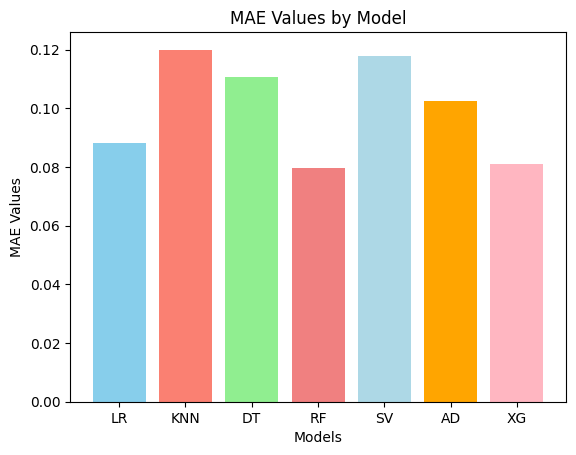

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Given data
models = ['LR', 'KNN', 'DT', 'RF', 'SV', 'AD', 'XG']
mae_values = [0.08830, 0.11996, 0.11068, 0.07964, 0.11776, 0.10262, 0.08086]

# Set custom colors for each label
colors = ['skyblue', 'salmon', 'lightgreen', 'lightcoral', 'lightblue', 'orange', 'lightpink']

# Create a bar plot for MAE
plt.bar(models, mae_values, color=colors)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('MAE Values')
plt.title('MAE Values by Model')

# Display the plot
plt.show()

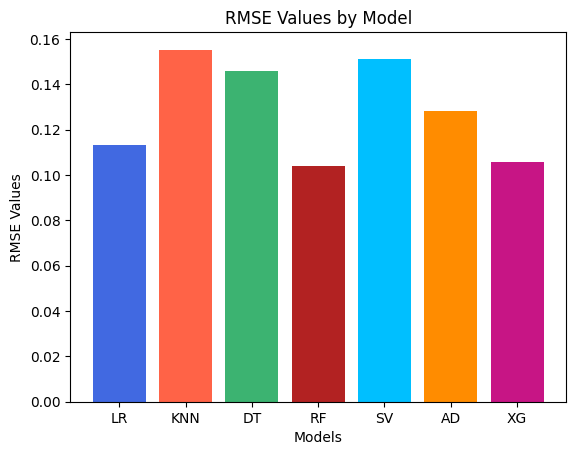

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Given data
models = ['LR', 'KNN', 'DT', 'RF', 'SV', 'AD', 'XG']
rmse_values = [0.11344, 0.15526, 0.14580, 0.10408, 0.15110, 0.12802, 0.10562]

# Set bold colors for each label
colors = ['royalblue', 'tomato', 'mediumseagreen', 'firebrick', 'deepskyblue', 'darkorange', 'mediumvioletred']

# Create a bar plot for RMSE
plt.bar(models, rmse_values, color=colors)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('RMSE Values')
plt.title('RMSE Values by Model')

# Display the plot
plt.show()

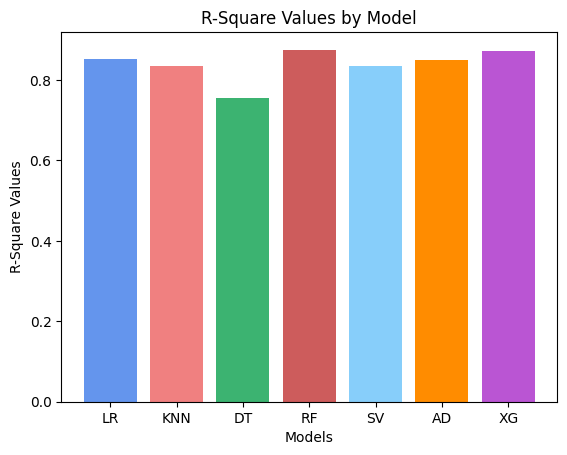

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Given data
models = ['LR', 'KNN', 'DT', 'RF', 'SV', 'AD', 'XG']
rsquare_values = [0.85272, 0.83434, 0.75462, 0.87532, 0.83516, 0.85032, 0.87186]

# Set distinct colors for each label
colors = ['cornflowerblue', 'lightcoral', 'mediumseagreen', 'indianred', 'lightskyblue', 'darkorange', 'mediumorchid']

# Create a bar plot for R-Square
plt.bar(models, rsquare_values, color=colors)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('R-Square Values')
plt.title('R-Square Values by Model')

# Display the plot
plt.show()

In [ ]:
count = 1
for fd in [x_1, x_2, x_3, x_4, x_5]:
  result = pd.concat([fd, y], axis=1)
  result.to_excel(f'X{count}.xlsx', sheet_name=f'sheet{count}', index=False)
  count = count + 1

In [ ]:
report_df.to_excel('report.xlsx', sheet_name='report')